# Terminologie
Dieses Notebook dient dazu, Bilder und segmentierte Bilder verschiedener Art zu zeigen, um gängige Terminologie zu erklären.

In [1]:
from skimage.io import imread, imshow
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import stackview
import numpy as np

## Intensitätsbilder
Wir beginnen mit Intensitätsbildern, wie sie üblicherweise von Mikroskopen erzeugt werden.

C:\Users\haase\mambaforge\envs\bio39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


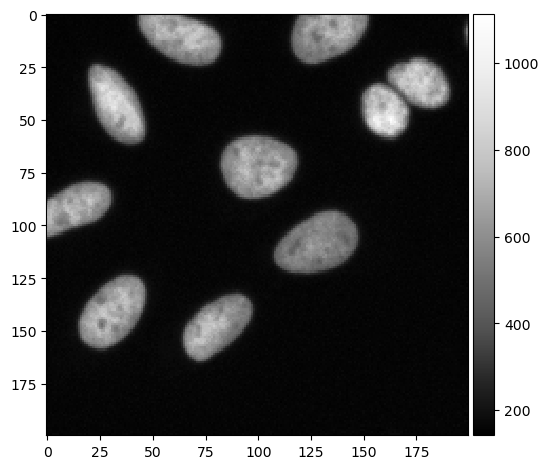

In [2]:
input_image = imread("../../data/BBBC022/IXMtest_A02_s9.tif")[:,:,0]

cropped_image = input_image[0:200, 200:400]

imshow(cropped_image, cmap='Greys_r')

## Binäre Bilder
Grundlegende Segmentierungsalgorithmen führen zu binären Bildern. Sie zeichnen sich dadurch aus, dass sie nur zwei verschiedene Intensitäten wie `0` und `1` haben.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
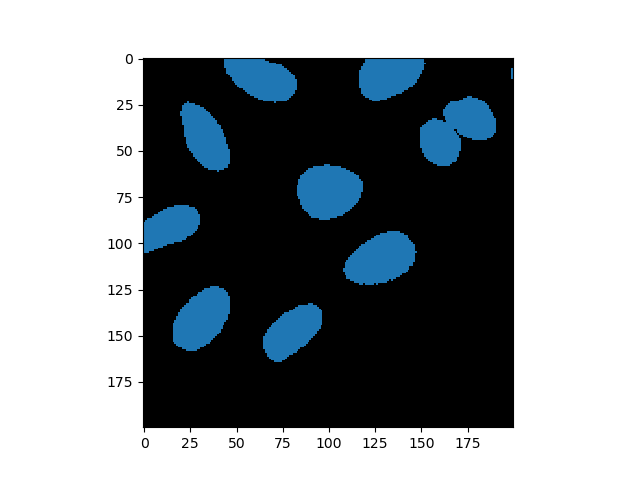

In [3]:
binary_image = nsbatwm.threshold_otsu(cropped_image)
binary_image

## Instanzsegmentierung
Wenn jedes einzelne Objekt seine eigene Intensität / Farbe hat, nennen wir es ein Instanzsegmentierungs-Labelbild. Die Instanzen werden mit ganzen Zahlen markiert. Die maximale Intensität (Label) in diesem Bild entspricht typischerweise der Anzahl der Objekte.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
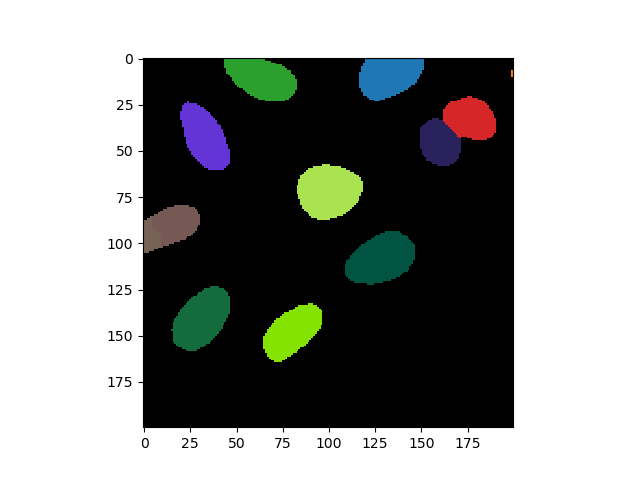

In [4]:
instance_segmentation = nsbatwm.voronoi_otsu_labeling(cropped_image, 
                                        spot_sigma=5, 
                                        outline_sigma=1)

instance_segmentation

Wenn Sie dieses Notebook lokal ausführen, können Sie mit der Maus über das Bild fahren und die Pixelintensitäten untersuchen.

In [5]:
import stackview
stackview.picker(instance_segmentation)

## Semantische Segmentierung
Semantische Segmentierungs-Labelbilder können mehr als zwei Labels haben und kennzeichnen typischerweise Regionen, in denen Pixel die gleiche Bedeutung haben, zum Beispiel: Zellkerne, Kernhülle und Hintergrund.

StackViewNDArray([[1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1],
                  ...,
                  [1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1],
                  [1, 1, 1, ..., 1, 1, 1]], dtype=int64)
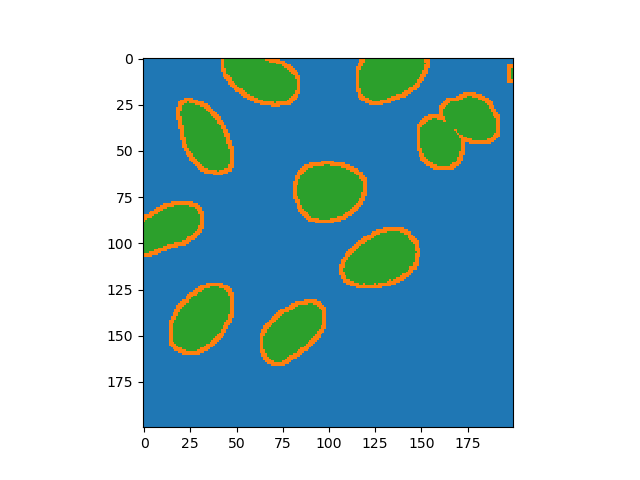

In [6]:
semantic_segmentation = binary_image + nsbatwm.maximum_filter(binary_image).astype(np.uint32) + 1
semantic_segmentation

## Spärliche Annotationen
Annotierte Labelbilder werden typischerweise von Menschen gezeichnet. Wenn Sie dieses Notebook lokal ausführen, können Sie einige Annotationen zeichnen. Wenn Sie ein paar Zellkerne präzise annotieren, erstellen Sie eine spärliche Zellkernannotation. Halten Sie die ALT-Taste gedrückt, um eine Annotation zu löschen.

In [7]:
sparse_label_annotation = np.zeros_like(cropped_image, dtype=np.uint32)
stackview.annotate(cropped_image, sparse_label_annotation)

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
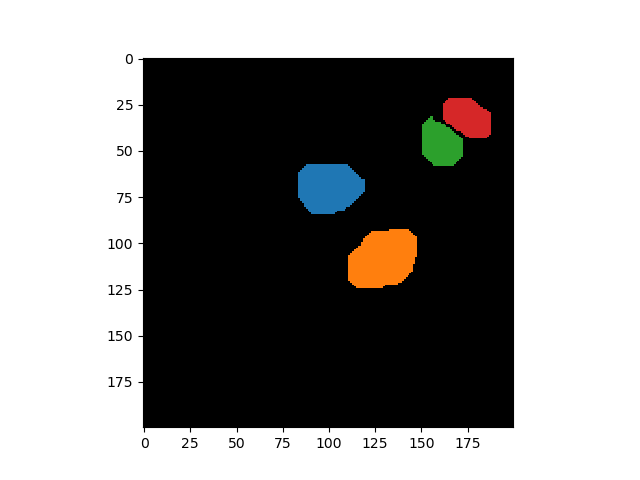

In [8]:
stackview.insight(sparse_label_annotation)

Sie können auch eine spärliche semantische Annotation erstellen, z.B. indem Sie einige Pixel innerhalb der Zellkerne und einige Pixel innerhalb des Hintergrunds annotieren.

In [9]:
sparse_semantic_annotation = np.zeros_like(cropped_image, dtype=np.uint32)
stackview.annotate(cropped_image, sparse_semantic_annotation)

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
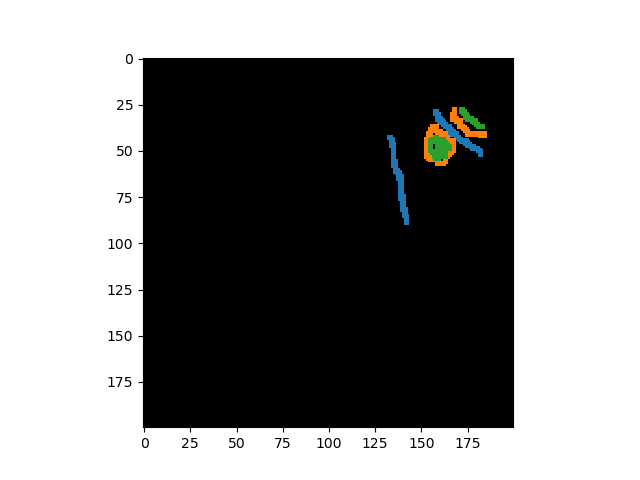

In [10]:
stackview.insight(sparse_semantic_annotation)